GLOBAL FEATURE IMPORTANCE


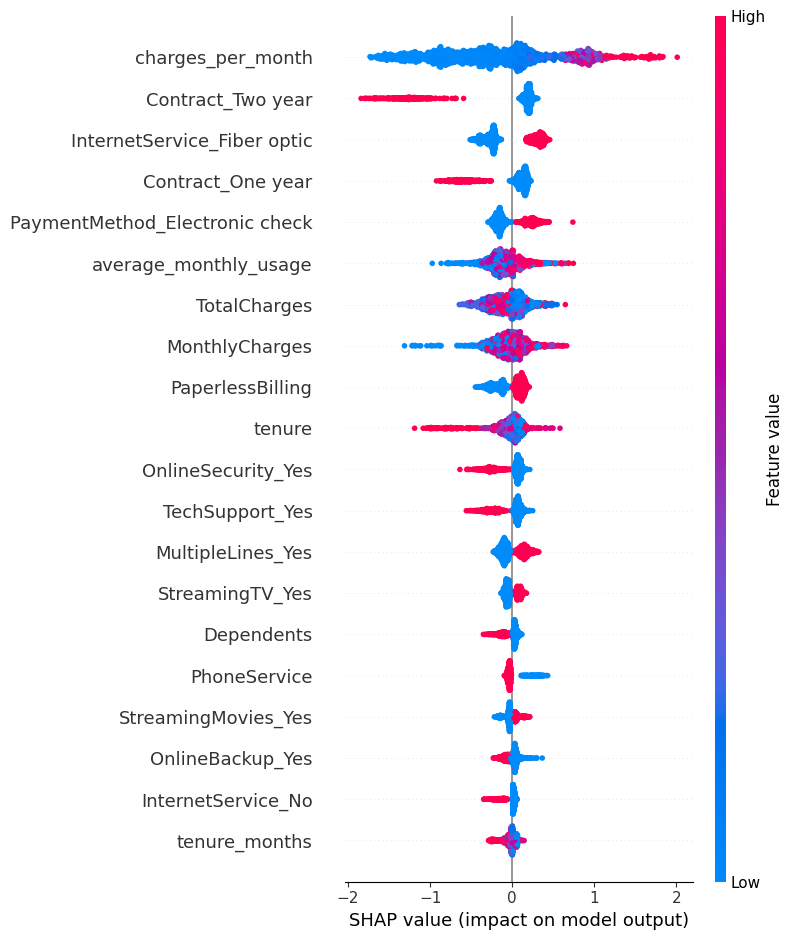

INDIVIDUAL CUSTOMER EXPLANATION


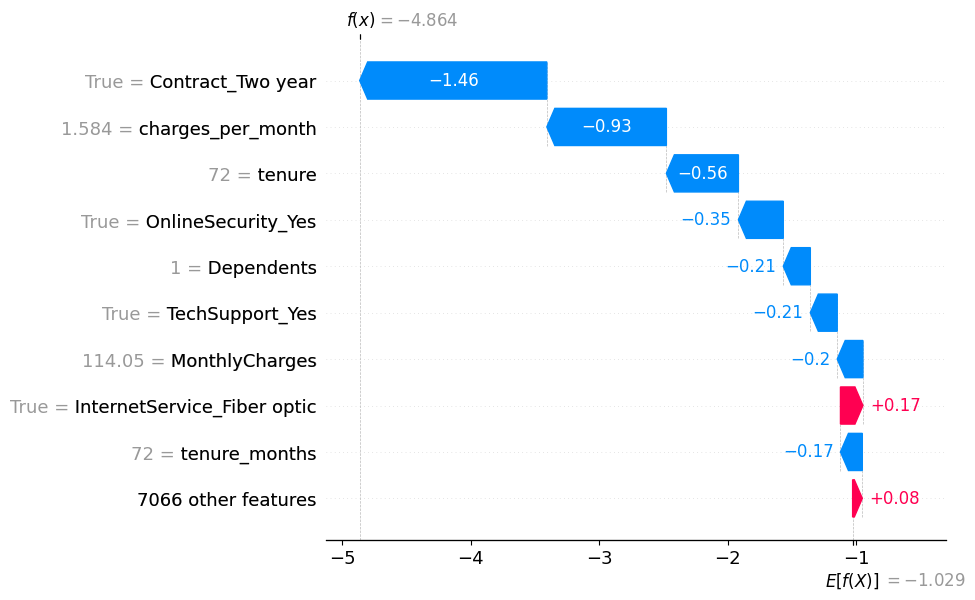


DAY 19 FIXED & COMPLETED SUCCESSFULLY


In [3]:
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load encoded dataset
df = pd.read_csv("../data/encoded_churn.csv")

# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# 🔥 FORCE ALL FEATURES TO NUMERIC (IMPORTANT FIX)
X = X.apply(pd.to_numeric, errors="coerce")

# Fill any remaining NaN values
X = X.fillna(0)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Train XGBoost model
model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

model.fit(X_train, y_train)

# -------------------------
# SHAP EXPLAINER (TREE EXPLAINER – STABLE)
# -------------------------
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# -------------------------
# 1️⃣ GLOBAL FEATURE IMPORTANCE
# -------------------------
print("GLOBAL FEATURE IMPORTANCE")
shap.summary_plot(shap_values, X_test)

# -------------------------
# 2️⃣ INDIVIDUAL CUSTOMER EXPLANATION
# -------------------------
print("INDIVIDUAL CUSTOMER EXPLANATION")
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=X_test.iloc[0],
        feature_names=X_test.columns
    )
)

print("\nDAY 19 FIXED & COMPLETED SUCCESSFULLY")
